<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: World Development Statistics

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Replace this cell with your problem statement.*

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

For our first project, we're going to take a look at World Development Statistics from [Gapminder](https://www.gapminder.org/about/), an independent Swedish foundation that aims to make data about the world more accessible and reliable. A good introduction on Gapminder is this [Ted Talk](https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen) from Hans Rosling, which also shows how effective data visualization can be for your audience.

**To-Do:** *Fill out this cell (or edit the above cell) with any other background or information that is necessary for your problem statement.*

### Choose your Data

There are 3 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online. 

**HINT: There are more datasets available on the Gapminder website**

* [`population.csv`](./data/population.csv): Population by Country
* [`life_expectancy.csv`](./data/life_expectancy.csv): Life Expectancy by Country
* [`gni_per_cap_atlas_method_con2021.csv`](./data/gni_per_cap_atlas_method_con2021.csv): Gross National Income (GNI) per capita in current US dollars

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def find_mean(list_num):
    sum_num = 0
    for num in list_num:
        sum_num += num
    return sum_num/len(list_num)

In [2]:
find_mean([1,2,3,7,9])

4.4

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
def find_std(data_list):
    u_mean = find_mean(data_list) #find_mean() is a function to find the mean of a value
    n_number_of_values = len(data_list)

    #use a for-loop to find the total sum of squares (xi - i)^2 for each number in list
    total_sum_squares = 0
    for num in data_list:
        total_sum_squares += (num-u_mean)**2
    #find the standard deviation
    std = (total_sum_squares/(n_number_of_values))**(1/2)
    return std

In [4]:
find_std([1,2,3,7,9])

3.0724582991474434

3. Data cleaning function:
    
    Write a function that takes in a string consisting a number and an abbreviated place value (ex. '5M', '45K'), and converts that string to an integer. For example, inputting '5M' in your function should return 5000000, '45K' should return 45000, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [5]:
# Code:
def string_to_num(string_num):
    """ This function converts an abbreviated string to a float number: '5.3k' to 53000. """
    # # Dictionary to "translate" the number of zeros based on the abbreviation in the string
    abrev_to_zeroes_dict = {'K': 1000, 'M': 1000000, 'B': 1000000000 }
   
    # make sure that the input is a string for this to work:
    
    # isinstance() returns True if the specified object is of a specific type, otherwise return False.
    if isinstance(string_num, int) or isinstance(string_num, float):
        return string_num
        
    # If there's no abbreviation and only numbers, return the string_num as an integer
    if string_num[-1].isdigit():
        return float(string_num)
    else:
        number_of_zeros = string_num[-1].upper()
        num_part = string_num[:-1]

        # Convert the numerical part to integer and multiply by the corresponding place value
        return float(num_part) * abrev_to_zeroes_dict.get(number_of_zeros, 1)

In [6]:
string_to_num('5M')

5000000.0

In [7]:
string_to_num('5.3k')

5300.0

In [8]:
# test with int
string_to_num(40)

40

In [9]:
# test with float
string_to_num(490.0)

490.0

In [10]:
def convert_string_to_num(df):
    """ Function to convert abbreviated string to a numeric data in a dataframe, element-wise using .apply()
    and string_to_num() function above."""
    # first column population_clean[0] contain strings of country names, so we will skip this
    for column in df.columns[1:]:
        # Use .loc[:, column] to ensure we are modifying the original DataFrame
        df.loc[:, column] = df[column].apply(lambda element: string_to_num(element))

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [11]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind reasonable values for each column).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of abbreviated numbers (ex. '3M', '45K', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to integers! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [12]:
# import datasets:
population = pd.read_csv('../data/population.csv')
gni = pd.read_csv('../data/gni_per_cap_atlas_method_con2021.csv')
starlink_2018 = pd.read_csv('../data/StarlinkData_2018.csv')

#### Population Data
The population data was obtained from Gapminder.org, which defines a population as a total number of inhabitants living in a country.
While the raw data provides data from 1800 and forecasted to 2100, I am only interested in the population data in recent years, particularly 2018 and 2024, given the fast adoption rate of internet technology.

Population data clean up includes:
- verify that the data type is appropriate for the data, i.e. country name is a 'string'
- remove NaN values
- convert abbreviated string data into numeric string data: (3.28M to 3,280,000)

In [13]:
# Display the data and print the first 5 rows of each dataframe
population.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M


In [14]:
# examine the data using .info()
# note thhat there are a lot of object types
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2100
dtypes: object(302)
memory usage: 464.9+ KB


In [15]:
# identify missing data using .isna() method, or .value_counts(dropna=False)
# population.isna() -> Returns a datframe with TRUE for any missing values
# population.isna().sum() -> returns a count of missing values by column

# here, I will select the rows with missing values only:
population[population.isna().any(axis=1)]

# Note: Holy See country has NaN values from column 2001 to 2100.

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
74,Holy See,905,905,905,905,905,905,905,905,905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# remove the row with NaN values and reassign a new dataframe variable:
population_drop = population.dropna()
population_drop

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.2k,47.2k,...,432k,434k,435k,436k,437k,438k,439k,440k,441k,441k
193,Yemen,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,...,73.2M,73.3M,73.5M,73.6M,73.7M,73.8M,73.9M,74M,74.1M,74.2M
194,South Africa,1.45M,1.45M,1.46M,1.46M,1.47M,1.47M,1.48M,1.49M,1.49M,...,75.6M,75.5M,75.4M,75.3M,75.2M,75.1M,75M,74.8M,74.7M,74.6M
195,Zambia,747k,758k,770k,782k,794k,806k,818k,831k,843k,...,60.3M,60.7M,61.1M,61.5M,61.9M,62.2M,62.6M,62.9M,63.3M,63.6M


In [17]:
#check if the rows with NaN values are removed: 
population_drop[population_drop.isna().any(axis=1)]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100


In [18]:
# since there are a lot of object types, let's convert them into strings so we can use our string_to_num() function above.
population_drop = population_drop.astype('string')
population_drop.dtypes

country    string[python]
1800       string[python]
1801       string[python]
1802       string[python]
1803       string[python]
                ...      
2096       string[python]
2097       string[python]
2098       string[python]
2099       string[python]
2100       string[python]
Length: 302, dtype: object

In [19]:
# use the convert_string_to_num function above to convert the dataframe element-wise
convert_string_to_num(population_drop)

#verify that the abbreviated strings are converted to numeric population data for all year columns.
population_drop.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,...,108000000.0,108000000.0,109000000.0,109000000.0,109000000.0,110000000.0,110000000.0,110000000.0,111000000.0,111000000.0
1,Angola,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,...,125000000.0,126000000.0,127000000.0,128000000.0,129000000.0,130000000.0,131000000.0,131000000.0,132000000.0,133000000.0
2,Albania,400000.0,402000.0,404000.0,405000.0,407000.0,409000.0,411000.0,413000.0,414000.0,...,1350000.0,1320000.0,1290000.0,1260000.0,1230000.0,1210000.0,1180000.0,1150000.0,1120000.0,1100000.0
3,Andorra,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,...,62500.0,62200.0,61900.0,61700.0,61400.0,61200.0,60900.0,60700.0,60500.0,60200.0
4,United Arab Emirates,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,...,13500000.0,13500000.0,13600000.0,13700000.0,13800000.0,13800000.0,13900000.0,14000000.0,14000000.0,14100000.0


In [20]:
# double check the data types again to verify that all numeric data are floats. Country name can stay as strings.
population_drop.dtypes

country    string[python]
1800              float64
1801              float64
1802              float64
1803              float64
                ...      
2096              float64
2097              float64
2098              float64
2099              float64
2100              float64
Length: 302, dtype: object

In [21]:
# population dataset is ready, let's reassign to a new variable and save a copy to csv.
population_clean = population_drop
population_clean.to_csv('population_clean.csv')

#### GNI Data
Gross National Income (GNI) per capita, calculated using the Atlas method and adjusted to constant 2021 values, is a comprehensive measure that Gapminder and other international organizations use to evaluate the economic status of countries over time, taking into account inflation and other economic changes to allow for long-term comparisons.

GNI per capita data clean up includes:
- verify that the data type is appropriate for the data, i.e. country name is a 'string'
- remove NaN values
- convert abbreviated string data into numeric string data: (13.1k to 13,100)


In [22]:
# Display the data and print the first 5 rows of each dataframe
# Note: GNI data for each country spans from 1800 to 2050 with some abbreviated strings that should be floats or integers
gni.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751,767,783,800,817,834,852,870,888,907
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770,2830,2890,2950,3010,3080,3140,3210,3280,3340
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610,9820,10k,10.2k,10.5k,10.7k,10.9k,11.1k,11.4k,11.6k
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47.9k,48.9k,50k,51k,52.1k,53.2k,54.3k,55.5k,56.7k,57.9k
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12.8k,13.1k,13.4k,13.6k,13.9k,14.2k,14.5k,14.8k,15.2k,15.5k


In [23]:
# examine the data using .info()
#there are some floats and objects, which will need to be converted to string and then floats.
gni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Columns: 252 entries, country to 2050
dtypes: float64(97), object(155)
memory usage: 376.2+ KB


In [24]:
# identify missing data by selecting the rows with missing values only:
gni[gni.isna().any(axis=1)]

#Note: Liechtenstein have NaN values. I will removee Liechtenstein from the analysis since it is such a small country with a population of 39039 in 2021.

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
100,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# remove the row with NaN values and reassign a new dataframe variable:
gni_drop = gni.dropna()

#check if the rows with NaN values are removed: 
gni_drop[gni_drop.isna().any(axis=1)]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050


In [26]:
# since there are a lot of object types, let's convert them into strings so we can use our function above.
gni_drop = gni_drop.astype('string')
gni_drop.dtypes

country    string[python]
1800       string[python]
1801       string[python]
1802       string[python]
1803       string[python]
                ...      
2046       string[python]
2047       string[python]
2048       string[python]
2049       string[python]
2050       string[python]
Length: 252, dtype: object

In [27]:
# use the convert_string_to_num function above to convert the dataframe element-wise
convert_string_to_num(gni_drop)

#verify that the abbreviated strings are converted to numeric population data for all year columns.
gni_drop

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751.0,767.0,783.0,800.0,817.0,834.0,852.0,870.0,888.0,907.0
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770.0,2830.0,2890.0,2950.0,3010.0,3080.0,3140.0,3210.0,3280.0,3340.0
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610.0,9820.0,10000.0,10200.0,10500.0,10700.0,10900.0,11100.0,11400.0,11600.0
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47900.0,48900.0,50000.0,51000.0,52100.0,53200.0,54300.0,55500.0,56700.0,57900.0
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12800.0,13100.0,13400.0,13600.0,13900.0,14200.0,14500.0,14800.0,15200.0,15500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Samoa,373.0,373.0,373.0,373.0,373.0,373.0,373.0,374.0,374.0,...,5330.0,5440.0,5560.0,5670.0,5790.0,5920.0,6040.0,6170.0,6300.0,6440.0
187,Yemen,197.0,198.0,198.0,199.0,199.0,200.0,200.0,201.0,202.0,...,1440.0,1470.0,1500.0,1530.0,1560.0,1590.0,1630.0,1660.0,1700.0,1730.0
188,South Africa,800.0,791.0,782.0,773.0,765.0,724.0,724.0,786.0,687.0,...,7630.0,7790.0,7960.0,8130.0,8300.0,8480.0,8660.0,8840.0,9030.0,9220.0
189,Zambia,213.0,214.0,215.0,215.0,215.0,216.0,216.0,217.0,217.0,...,1260.0,1290.0,1320.0,1340.0,1370.0,1400.0,1430.0,1460.0,1490.0,1520.0


In [28]:
# check the data types again to verify that all numeric data are floats
gni_drop.dtypes

country    string[python]
1800              float64
1801              float64
1802              float64
1803              float64
                ...      
2046              float64
2047              float64
2048              float64
2049              float64
2050              float64
Length: 252, dtype: object

In [29]:
# this dataset is ready, let's reassign to a new variable and save a copy to csv file
gni_clean = gni_drop
gni_clean.to_csv('gni_clean.csv')

#### Starlink Satellite Internet Data
This dataset shows the affordability and need for Starlink satellite internet connections per country in 2018. It is taken from the "Satellite Constellation Internet Affordability and Need" Research Note published by Zenodo in the American Astronomical Society journal in 2020. [Zenodo data source](https://zenodo.org/records/4133884) 

In [30]:
# Step 1: Display the data and print the first 5 rows of each dataframe
starlink_2018.head()

,CountryName,ContinentName,ContinentCode,CountryCode,CurrentCost,InternetPercentage,GDPcapita,Pop,Category,Category2,Category3
0,Algeria,Africa,AF,DZA,25.93,0.595797,4114.715061,42200000,Unaffordable and needed,Cheaper than satellite,Unaffordable and/or not needed
1,Angola,Africa,AF,AGO,59.04,0.143391,3289.646664,30800000,Unaffordable and needed,Cheaper than satellite,Unaffordable and/or not needed
2,Benin,Africa,AF,BEN,59.34,0.200000,1240.829464,11500000,Unaffordable and needed,Cheaper than satellite,Unaffordable and/or not needed
3,Botswana,Africa,AF,BWA,112.38,0.470000,8279.601365,2250000,Affordable and needed,More expensive than satellite,Affordable and needed
4,Burundi,Africa,AF,BDI,283.73,0.026607,271.752044,11200000,Unaffordable and needed,More expensive than satellite,Unaffordable and/or not needed


In [31]:
# Step 2: examine the data using .info()
starlink_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CountryName         162 non-null    object 
 1   ContinentName       162 non-null    object 
 2   ContinentCode       139 non-null    object 
 3   CountryCode         162 non-null    object 
 4   CurrentCost         162 non-null    float64
 5   InternetPercentage  162 non-null    float64
 6   GDPcapita           162 non-null    float64
 7   Pop                 162 non-null    int64  
 8   Category            162 non-null    object 
 9   Category2           162 non-null    object 
 10  Category3           162 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 14.1+ KB


In [32]:
# I am using the population data and the gni_per_capita data from the gapminder.org datasets
# so I am only interested in the the following columns in this dataset:
selected_columns = ['CountryName', 'ContinentName', 'CurrentCost', 'InternetPercentage']
starlink_2018_condense = starlink_2018[selected_columns]

# and let's rename the columns to all lowercase with _ space
starlink_2018_condense = starlink_2018_condense.rename(columns={
    'CountryName': 'country',
    'ContinentName': 'continent_name',
    'CurrentCost': 'monthly_internet_cost_2018',
    'InternetPercentage': 'internet_percent_of_population'
})

starlink_2018_condense

,country,continent_name,monthly_internet_cost_2018,internet_percent_of_population
0,Algeria,Africa,25.93,0.595797
1,Angola,Africa,59.04,0.143391
2,Benin,Africa,59.34,0.200000
3,Botswana,Africa,112.38,0.470000
4,Burundi,Africa,283.73,0.026607
...,...,...,...,...
157,Guyana,South America,54.66,0.373258
158,Paraguay,South America,24.46,0.649935
159,Peru,South America,26.17,0.525403
160,Suriname,South America,39.82,0.489452


In [33]:
# align the country names:
# in the first run, I noticed that about 17 country names are not the same in the starlink_2018 dataset and the population dataset.
# this code uses replace() function to align these 8 country names before I merge it to the other tables:
# These countries having missing values for population and/or gni_percapita : 'Macao SAR China', 'Andorra', 'Monaco', 'San Marino', 'The Bahamas', 'Cayman Islands',
# 'Curacao', 'Greenland', 'Puerto Rico', 'Guam'

replace_country_name_dict = {
    'Egypt Arab Rep.': 'Egypt',
    'Brunei Darussalam': 'Brunei',
    'Hong Kong SAR China': 'Hong Kong, China',
    'Korea Rep.': 'South Korea',
    'Lao PDR': 'Lao',
    'Yemen Rep.': 'Yemen',
    'Russian Federation': 'Russia',
    'Micronesia': 'Micronesia, Fed. Sts.',
    'Bahamas The': 'Bahamas'
}

# Replace the values in the 'country' column
starlink_2018_condense['country'] = starlink_2018_condense['country'].replace(replace_country_name_dict)

In [34]:
# We will merge the datasets into one.
# I want the following years of interest data from population_clean and gni_clean
years_of_interest = ['2018', '2024']

# LEFT JOIN MERGE the population and gni data for each specified year TO the starlink_2018_condense dataset
for year in years_of_interest:
    # Create a temporary dataframe with renamed year-specific column
    temp_population = population_clean[['country', year]].rename(columns={year: f'population_{year}'})
    
    # Merge the temporary dataframe with starlink_2018_condense
    starlink_2018_condense = pd.merge(starlink_2018_condense, temp_population, on='country', how='left')


In [35]:
# do the same merge for GNI data:
years_of_interest = ['2018', '2024']

# LEFT JOIN MERGE the population and gni data for each specified year TO the starlink_2018_condense dataset
for year in years_of_interest:
    # Create a temporary dataframe with renamed year-specific column
    temp_gni = gni_clean[['country', year]].rename(columns={year: f'gni_{year}'})
    
    # Merge the temporary dataframe with starlink_2018_condense
    starlink_2018_condense = pd.merge(starlink_2018_condense, temp_gni, on='country', how='left')


In [36]:
starlink_2018_condense

,country,continent_name,monthly_internet_cost_2018,internet_percent_of_population,population_2018,population_2024,gni_2018,gni_2024
0,Algeria,Africa,25.93,0.595797,41900000.0,46300000.0,4150.0,3600.0
1,Angola,Africa,59.04,0.143391,31300000.0,37800000.0,3340.0,2100.0
2,Benin,Africa,59.34,0.200000,11900000.0,14100000.0,1250.0,1450.0
3,Botswana,Africa,112.38,0.470000,2450000.0,2720000.0,7820.0,7500.0
4,Burundi,Africa,283.73,0.026607,11500000.0,13600000.0,260.0,234.0
...,...,...,...,...,...,...,...,...
157,Guyana,South America,54.66,0.373258,786000.0,820000.0,6550.0,8370.0
158,Paraguay,South America,24.46,0.649935,6440000.0,6950000.0,5830.0,5710.0
159,Peru,South America,26.17,0.525403,32200000.0,34700000.0,6740.0,7160.0
160,Suriname,South America,39.82,0.489452,594000.0,629000.0,6220.0,4670.0


In [37]:
# there are some 10 rows (countries) with missing values for population columns and the gni columns. This is 18 out of 162 total rows.
# it could be that these data are missing in population.csv or gnni_percapita.csv
starlink_2018_condense[starlink_2018_condense.isna().any(axis=1)]

,country,continent_name,monthly_internet_cost_2018,internet_percent_of_population,population_2018,population_2024,gni_2018,gni_2024
54,Macao SAR China,Asia,37.48,0.837941,NaN,NaN,NaN,NaN
76,Andorra,Europe,32.65,0.915675,75000.0,80300.0,NaN,NaN
103,Monaco,Europe,34.49,0.970530,37000.0,36200.0,NaN,NaN
110,San Marino,Europe,48.97,0.601823,34200.0,33600.0,NaN,NaN
125,Cayman Islands,North America,150.07,0.810677,NaN,NaN,NaN,NaN
127,Curacao,North America,78.57,0.681272,NaN,NaN,NaN,NaN
131,Greenland,North America,163.68,0.694825,NaN,NaN,NaN,NaN
140,Puerto Rico,North America,47.99,0.705979,NaN,NaN,NaN,NaN
145,Guam,Oceania,79.00,0.805055,NaN,NaN,NaN,NaN
147,Micronesia Fed. Sts.,Oceania,81.00,0.353041,NaN,NaN,NaN,NaN


In [38]:
# Note: I will drop these countries from the analysis since they are really small in terms of population.

# remove the row with NaN values and reassign a new dataframe variable:
starlink_2018_condense_drop = starlink_2018_condense.dropna()

#check if the rows with NaN values are still here: They're removed
starlink_2018_condense_drop[starlink_2018_condense_drop.isna().any(axis=1)]

,country,continent_name,monthly_internet_cost_2018,internet_percent_of_population,population_2018,population_2024,gni_2018,gni_2024


In [39]:
# this dataset is ready for the next step so save to csv copy: 

starlink_2018_condense_drop.to_csv('starlink_2018_condense_drop.csv')
merged_df = starlink_2018_condense_drop
merged_df

,country,continent_name,monthly_internet_cost_2018,internet_percent_of_population,population_2018,population_2024,gni_2018,gni_2024
0,Algeria,Africa,25.93,0.595797,41900000.0,46300000.0,4150.0,3600.0
1,Angola,Africa,59.04,0.143391,31300000.0,37800000.0,3340.0,2100.0
2,Benin,Africa,59.34,0.200000,11900000.0,14100000.0,1250.0,1450.0
3,Botswana,Africa,112.38,0.470000,2450000.0,2720000.0,7820.0,7500.0
4,Burundi,Africa,283.73,0.026607,11500000.0,13600000.0,260.0,234.0
...,...,...,...,...,...,...,...,...
157,Guyana,South America,54.66,0.373258,786000.0,820000.0,6550.0,8370.0
158,Paraguay,South America,24.46,0.649935,6440000.0,6950000.0,5830.0,5710.0
159,Peru,South America,26.17,0.525403,32200000.0,34700000.0,6740.0,7160.0
160,Suriname,South America,39.82,0.489452,594000.0,629000.0,6220.0,4670.0


#### Additional Data
The dataset provides the average monthly internet cost in each country in 2018, 'monthly_internet_cost_\$\_2018'. Assumming that the ANNUAL internet service cost should be limited to 10% of the annual GNI per capita in order to be sustainable and affordable for the average user, I will calculate the annual internet cost as a percent of the 'gni per capita in 2018' for each country.

In [40]:
# find the annual country internet cost and create a temporary df to store the values:
temp_annual_internet_cost_2018 = merged_df.loc[:, 'monthly_internet_cost_2018'] * 12

In [41]:
# find the annual country cost as a percent of GNI per capita. Save and store as temp df:
temp_annual_cost_percent_GNI_2018 = temp_annual_internet_cost_2018/(merged_df.loc[:, 'gni_2018'])

In [42]:
# check the temporary df:
temp_df = pd.DataFrame({
    'country': merged_df['country'],
    'annual_internet_cost_2018': temp_annual_internet_cost_2018,
    'annual_cost_percent_GNI_2018': temp_annual_cost_percent_GNI_2018
})

temp_df.head()

,country,annual_internet_cost_2018,annual_cost_percent_GNI_2018
0,Algeria,311.16,0.074978
1,Angola,708.48,0.212120
2,Benin,712.08,0.569664
3,Botswana,1348.56,0.172450
4,Burundi,3404.76,13.095231


In [43]:
# find the forecasted monthly_internet_cost_2018 in in 2024, adjusted for inflation.
# the annual GLOBAL inflation rates from 2018 to 2023 are taken from statista.com: https://www.statista.com/statistics/256598/global-inflation-rate-compared-to-previous-year/

inflation_rates = {
    2018: 3.62,
    2019: 3.51,
    2020: 3.25,
    2021: 4.7,
    2022: 8.71,
    2023: 6.88}

def calculate_2024_cost(original_cost, inflation_rates):
    """Calculate the inflation adjusted cost of an item in 2024 giving the cost in 2018."""
    adjusted_cost = original_cost
    for year in sorted(inflation_rates.keys()):
        adjusted_cost *= (1 + inflation_rates[year] / 100)
    return adjusted_cost

In [44]:
## find the annual internet cost in 2024, adjusted for inflation, and store in a temporary df:
temp_annual_internet_cost_2024 = temp_df['annual_internet_cost_2018'].apply(lambda x: calculate_2024_cost(x, inflation_rates))

In [45]:
# find the annual cost as a percent of GNI per capita. Save and store as temp df:
temp_annual_cost_percent_GNI_2024 = temp_annual_internet_cost_2024/(merged_df.loc[:, 'gni_2024'])

In [46]:
# combine the created rows into a new dataframe temp_df and check:
temp_df = pd.DataFrame({
    'country': merged_df['country'],
    'annual_internet_cost_2018': temp_annual_internet_cost_2018,
    'annual_cost_percent_GNI_2018': temp_annual_cost_percent_GNI_2018,
    'annual_internet_cost_2024': temp_annual_internet_cost_2024,
    'annual_cost_percent_GNI_2024': temp_annual_cost_percent_GNI_2024
})

temp_df

,country,annual_internet_cost_2018,annual_cost_percent_GNI_2018,annual_internet_cost_2024,annual_cost_percent_GNI_2024
0,Algeria,311.16,0.074978,419.191379,0.116442
1,Angola,708.48,0.212120,954.456576,0.454503
2,Benin,712.08,0.569664,959.306456,0.661591
3,Botswana,1348.56,0.172450,1816.765413,0.242235
4,Burundi,3404.76,13.095231,4586.855762,19.601948
...,...,...,...,...,...
157,Guyana,655.92,0.100140,883.648313,0.105573
158,Paraguay,293.52,0.050346,395.426962,0.069252
159,Peru,314.04,0.046593,423.071284,0.059088
160,Suriname,477.84,0.076823,643.740868,0.137846


In [47]:
# LEFT JOIN temp df to merged_df on country name:
merged_df = pd.merge(merged_df, temp_df, on='country', how='left')


In [48]:
## verify that merged_df columns are in order, spot check the results in the new columns, and save a .csv copy:
merged_df.to_csv('merged_df.csv')
merged_df

,country,continent_name,monthly_internet_cost_2018,internet_percent_of_population,population_2018,population_2024,gni_2018,gni_2024,annual_internet_cost_2018,annual_cost_percent_GNI_2018,annual_internet_cost_2024,annual_cost_percent_GNI_2024
0,Algeria,Africa,25.93,0.595797,41900000.0,46300000.0,4150.0,3600.0,311.16,0.074978,419.191379,0.116442
1,Angola,Africa,59.04,0.143391,31300000.0,37800000.0,3340.0,2100.0,708.48,0.212120,954.456576,0.454503
2,Benin,Africa,59.34,0.200000,11900000.0,14100000.0,1250.0,1450.0,712.08,0.569664,959.306456,0.661591
3,Botswana,Africa,112.38,0.470000,2450000.0,2720000.0,7820.0,7500.0,1348.56,0.172450,1816.765413,0.242235
4,Burundi,Africa,283.73,0.026607,11500000.0,13600000.0,260.0,234.0,3404.76,13.095231,4586.855762,19.601948
...,...,...,...,...,...,...,...,...,...,...,...,...
147,Guyana,South America,54.66,0.373258,786000.0,820000.0,6550.0,8370.0,655.92,0.100140,883.648313,0.105573
148,Paraguay,South America,24.46,0.649935,6440000.0,6950000.0,5830.0,5710.0,293.52,0.050346,395.426962,0.069252
149,Peru,South America,26.17,0.525403,32200000.0,34700000.0,6740.0,7160.0,314.04,0.046593,423.071284,0.059088
150,Suriname,South America,39.82,0.489452,594000.0,629000.0,6220.0,4670.0,477.84,0.076823,643.740868,0.137846


In [49]:
## find the annual SATELLITE internet cost in 2018 (assuming 60 USD/month so 720 USD/year), as a percentage of a country's GNI per capita in 2018
# create a temporary df to store the values:
temp_sat_annual_internet_cost_2018 = 720/merged_df.loc[:, 'gni_2018']

In [50]:
## find the annual SATELLITE internet cost in 2024 (assuming 69 USD/month so 828 USD/year), as a percentage of a country's GNI per capita per capita in 2024
# create a temporary df to store the values:
temp_sat_annual_internet_cost_2024 = 828/merged_df.loc[:, 'gni_2024']
temp_sat_annual_internet_cost_2024

0      0.230000
1      0.394286
2      0.571034
3      0.110400
4      3.538462
         ...   
147    0.098925
148    0.145009
149    0.115642
150    0.177302
151    0.047586
Name: gni_2024, Length: 152, dtype: float64

In [51]:
# combine the created rows into a new dataframe temp_df_sat and check:
temp_df_sat = pd.DataFrame({
    'country': merged_df['country'],
    'sat_annual_cost_per_gni_2018': temp_sat_annual_internet_cost_2018,
    'sat_annual_cost_per_gni_2024': temp_sat_annual_internet_cost_2024
})

temp_df_sat

,country,sat_annual_cost_per_gni_2018,sat_annual_cost_per_gni_2024
0,Algeria,0.173494,0.230000
1,Angola,0.215569,0.394286
2,Benin,0.576000,0.571034
3,Botswana,0.092072,0.110400
4,Burundi,2.769231,3.538462
...,...,...,...
147,Guyana,0.109924,0.098925
148,Paraguay,0.123499,0.145009
149,Peru,0.106825,0.115642
150,Suriname,0.115756,0.177302


In [52]:
# LEFT JOIN temp df to merged_df on country name:
merged_df = pd.merge(merged_df, temp_df_sat, on='country', how='left')

In [53]:
merged_df.to_csv('merged_df.csv')
merged_df

,country,continent_name,monthly_internet_cost_2018,internet_percent_of_population,population_2018,population_2024,gni_2018,gni_2024,annual_internet_cost_2018,annual_cost_percent_GNI_2018,annual_internet_cost_2024,annual_cost_percent_GNI_2024,sat_annual_cost_per_gni_2018,sat_annual_cost_per_gni_2024
0,Algeria,Africa,25.93,0.595797,41900000.0,46300000.0,4150.0,3600.0,311.16,0.074978,419.191379,0.116442,0.173494,0.230000
1,Angola,Africa,59.04,0.143391,31300000.0,37800000.0,3340.0,2100.0,708.48,0.212120,954.456576,0.454503,0.215569,0.394286
2,Benin,Africa,59.34,0.200000,11900000.0,14100000.0,1250.0,1450.0,712.08,0.569664,959.306456,0.661591,0.576000,0.571034
3,Botswana,Africa,112.38,0.470000,2450000.0,2720000.0,7820.0,7500.0,1348.56,0.172450,1816.765413,0.242235,0.092072,0.110400
4,Burundi,Africa,283.73,0.026607,11500000.0,13600000.0,260.0,234.0,3404.76,13.095231,4586.855762,19.601948,2.769231,3.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Guyana,South America,54.66,0.373258,786000.0,820000.0,6550.0,8370.0,655.92,0.100140,883.648313,0.105573,0.109924,0.098925
148,Paraguay,South America,24.46,0.649935,6440000.0,6950000.0,5830.0,5710.0,293.52,0.050346,395.426962,0.069252,0.123499,0.145009
149,Peru,South America,26.17,0.525403,32200000.0,34700000.0,6740.0,7160.0,314.04,0.046593,423.071284,0.059088,0.106825,0.115642
150,Suriname,South America,39.82,0.489452,594000.0,629000.0,6220.0,4670.0,477.84,0.076823,643.740868,0.137846,0.115756,0.177302


### Data Dictionary

Datasets from Gapminder.org including population, GNI, adult literacy rate, and broadband subscribers per 100 people will serve as our primary data sources.
Data on the average monthly cost (USD) of internet access in a given country and the percentage of the population with access to the internet was obtained from a Research Note by the American Astronomical Society titled "Satellite Constellation Internet Affordability and Need" [Link to Research Note](https://iopscience.iop.org/article/10.3847/2515-5172/abc48e) and [Link to dataset]('https://zenodo.org/records/4133884')

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**country**|*string*|Gapminder|Name of the country or region.|
|**year**|*integer*|Gapminder|The year the data was recorded.|
|**monthly_internet_cost_2018**|*float*|AAS|The average monthly cost in USD of internet access in a given country in 2018.|
|**internet_percent_of_population**|*float*|AAS|The percentage of the population with internet access in 2018. An internet user is defined by the International Telecommunication Union as anyone who has accessed the internet from any location in the last three months. This can be from any type of device, including a computer, mobile phone, personal digital assistant, games machine, digital TV, and other technological devices.|
|**population_2018**|*float*|Gapminder|Using the UN POP data forecast models, this is the number of inhabitants living in a country in 2018.|
|**population_2024**|*float*|Gapminder|Using the UN POP data forecast models, this is the number of inhabitants living in a country in 2024.|
|**gni_2018**|*float*|Gapminder|Gross National Income (GNI) per capita in US dollars, adjusted for purchasing power parity (PPP), indicating the economic strength of the country or region in 2018.|
|**gni_2024**|*float*|Gapminder|Gross National Income (GNI) per capita in US dollars, adjusted for purchasing power parity (PPP), indicating the economic strength of the country or region in 2024.|
|**annual_internet_cost_2018**|*float*|Calculated|The annual cost of monthly internet fees in 2018 (monthly_internet_cost_2018 x 12).|
|**annual_internet_cost_2024**|*float*|Calculated|The annual cost of monthly internet fees in 2024, adjusted for inflation.|
|**annual_cost_percent_GNI_2018**|*float*|Calculated|The annual cost of internet access as a percent of GNI per capita in 2018, (annual_internet_cost_2018 / gni_2018)|
|**annual_cost_percent_GNI_2024**|*float*|Calculated|The annual cost of internet access as a percent of GNI per capita in 2024, (annual_internet_cost_2024 / gni_2024)|
|**sat_annual_cost_per_GNI_2018**|*float*|Calculated|The annual cost of satellite internet as a percent of GNI per capita in 2018, assuming a 60 USD/month cost for Starlink. ((60 x 12)/ gni_2018)|
|**sat_annual_cost_per_GNI_2024**|*float*|Calculated|The annual cost of satellite internet as a percent of GNI per capita in 2024, assuming a 60 USD/month monthly cost for Starlink. (69 x 12)/ gni_2024).|


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in one of your dataframes.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value
        - *Example Output :* `{'1801': 3.80, '1802': 3.93, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest populations for the past few decades?
        - Which states have the highest and lowest economic growth over the course of the dataset?
        - What years were there new countries created?
        - Do any countries have higher growth rates of population than their economy?
        - Which countries have had the lowest population growth?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### 2018 EDA Findings:
- The mean monthly internet cost in 2018 is around 71.87 USD and the standard deviation is 207.87 USD. 
- The 'starlink_2018.csv' data shows the monthly cost of internet access in Yemen is 2466 USD/month in 2018!! This could be a data outlier or data handling error, or the expensive cost could be a result of ongoing humanitarian crisis in Yemen.
- In 2018, the mean percentage of the population with access to the internet is around 59%. However, the developing countries in Africa and Asia have the lowest percentages.
- Internet access is unaffordable for most of the world with some very extreme cases. On average, the annual internet cost as a percent of annual GNI per capita is 51.1%.
- Due to economic conditions and inflations, the annual internet cost as a percent of annual GNI per capita has increased from 51.1% in 2018 to 69.63% in 2024.
- In 2018: there are 53 countries (26 in Africa and 16 in Asia) that really need cheaper and better internet service, either as traditional broadband internet infrastructure or satellite services. These 56 countries are good candidates to expand the satellite internet expansion business with some form of government subsidies or a more economical satellite internet pricing model.
- In 2018: there are 22 countries (8-Europe, 8-North America, 3-Africa, 3-South America, 2-Asia) in which the population lacks internet access and CAN AFFORD satellite internet, assuming a conservative monthly cost of 60 USD/month.

#### 2024 Projection Findings:
Based on the 2024 population and GNI per capita data, the 2018 country internet access percentage of the population, and the $69/month average cost of Starlink service:

How many countries have an average annual internet cost that is higher than 10% of the GNI per capita?
- In 2024, there are 66 countries, including 30 African countries and 20 Asian countries, that have an annual internet cost that is higher than 10% of the GNI per capita. In 2018, there were 53 countries.

What are the candidate countries where Starlink can expand their internet satellite businesss?
- In 2024, there are 23 countries (9-Europe, 5-North America, 3-Africa, 4-South America, 2-Asia) in which the population lacks internet access and CAN AFFORD SATELLITE internet.


In [54]:
# Step 1: Summary Statistics
merged_df_summary_stats = merged_df.describe()
merged_df_summary_stats

,monthly_internet_cost_2018,internet_percent_of_population,population_2018,population_2024,gni_2018,gni_2024,annual_internet_cost_2018,annual_cost_percent_GNI_2018,annual_internet_cost_2024,annual_cost_percent_GNI_2024,sat_annual_cost_per_gni_2018,sat_annual_cost_per_gni_2024
count,152.000000,152.000000,1.520000e+02,1.520000e+02,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,71.866447,0.591496,4.691184e+07,4.930428e+07,15854.052632,16517.743421,862.397368,0.513203,1161.812386,0.696370,0.220453,0.244932
std,207.047593,0.263796,1.643192e+08,1.693962e+08,19717.408489,20396.681623,2484.571118,2.778915,3347.187276,3.843327,0.341531,0.399214
min,6.640000,0.026607,4.600000e+04,4.240000e+04,260.000000,234.000000,79.680000,0.005553,107.344032,0.006904,0.008304,0.009550
25%,26.110000,0.378314,2.870000e+06,2.810000e+06,2917.500000,3295.000000,313.320000,0.017086,422.101307,0.022519,0.037363,0.038840
50%,41.745000,0.644679,9.515000e+06,1.009500e+07,6810.000000,7310.000000,500.940000,0.049541,674.860937,0.065581,0.105738,0.113317
75%,59.595000,0.807323,3.240000e+07,3.615000e+07,19275.000000,21325.000000,715.140000,0.186557,963.428855,0.246396,0.246787,0.251334
max,2466.670000,0.996528,1.420000e+09,1.440000e+09,86700.000000,86700.000000,29600.040000,31.223671,39876.853000,42.740464,2.769231,3.538462


### Observations on the summary statistics:
- The mean monthly internet cost in 2018 is around 71.87 USD and the standard deviation is 207.87 USD! 
- The 'starlink_2018.csv' data shows the monthly cost of internet access in Yemen is 2466 USD/month in 2018!! This could be a data outlier or data handling error, or the expensive cost could be a result of ongoing humanitarian crisis in Yemen.
- In 2018, the mean percentage of the population with access to the internet is around 59%. However, the developing countries in Africa and Asia have the lowest percentages.
- Internet access is unaffordable for most of the world with some very extreme cases. On average, the annual internet cost as a percent of annual GNI per capita is 51.1%. .
- Due to economic conditions and inflations, the annual internet cost as a percent of annual GNI per capita has increased from 51.1% in 2018 to 69.63% in 2024.

In [55]:
# Step 2: apply the standard deviation function 

# I choose to analyze the monthly_internet_cost_2018 because it seems like there is an outlier
find_std([x for x in merged_df['monthly_internet_cost_2018']])

206.36539169321634

In [56]:
#Step 3: Investigate trends in the data.
# Using sorting and/or masking (along with the .head() method to avoid printing our entire dataframe), consider questions relevant to your problem statement.

In [57]:
# A) Which country has the highest internet access monthly cost in 2018?
merged_df.sort_values(by='monthly_internet_cost_2018', ascending=False).head(10)

,country,continent_name,monthly_internet_cost_2018,internet_percent_of_population,population_2018,population_2024,gni_2018,gni_2024,annual_internet_cost_2018,annual_cost_percent_GNI_2018,annual_internet_cost_2024,annual_cost_percent_GNI_2024,sat_annual_cost_per_gni_2018,sat_annual_cost_per_gni_2024
73,Yemen,Asia,2466.67,0.267184,30800000.0,35200000.0,948.0,933.0,29600.04,31.223671,39876.853000,42.740464,0.759494,0.887460
20,Mauritania,Africa,694.63,0.208010,4270000.0,4990000.0,1710.0,1870.0,8335.56,4.874596,11229.576068,6.005121,0.421053,0.442781
4,Burundi,Africa,283.73,0.026607,11500000.0,13600000.0,260.0,234.0,3404.76,13.095231,4586.855762,19.601948,2.769231,3.538462
10,Equatorial Guinea,Africa,259.38,0.262400,1500000.0,1750000.0,7010.0,4890.0,3112.56,0.444017,4193.207089,0.857507,0.102710,0.169325
69,Turkmenistan,Asia,224.68,0.212510,6070000.0,6600000.0,7020.0,8230.0,2696.16,0.384068,3632.237524,0.441341,0.102564,0.100608
30,Tanzania,Africa,188.16,0.250000,58100000.0,69400000.0,1070.0,1130.0,2257.92,2.110206,3041.845346,2.691899,0.672897,0.732743
23,Mozambique,Africa,175.25,0.100000,29400000.0,34900000.0,479.0,534.0,2103.00,4.390397,2833.138802,5.305503,1.503132,1.550562
39,Brunei,Asia,157.02,0.946000,434000.0,456000.0,30600.0,34000.0,1884.24,0.061576,2538.427701,0.074660,0.023529,0.024353
36,Bahrain,Asia,145.89,0.986434,1490000.0,1500000.0,22900.0,20800.0,1750.68,0.076449,2358.497117,0.113389,0.031441,0.039808
24,Namibia,Africa,133.38,0.510000,2410000.0,2650000.0,5120.0,4490.0,1600.56,0.312609,2156.257081,0.480235,0.140625,0.184410


In [58]:
# NOTE: the Republic of Yemen has the highest monthly internet cost of 2018 by far.
# In the top 10 most expensiive internet list, 5 countries are in Africa and 3 countries are in Asia, and 2 countries are in North America
# The expensive cost may be due to these countries being geographically remote and/or experiencing internal conflicts (war, protests...)

In [59]:
# B) Which country has the lowest internet access rate of 2018?
merged_df.sort_values(by='internet_percent_of_population', ascending=True).head(10)

,country,continent_name,monthly_internet_cost_2018,internet_percent_of_population,population_2018,population_2024,gni_2018,gni_2024,annual_internet_cost_2018,annual_cost_percent_GNI_2018,annual_internet_cost_2024,annual_cost_percent_GNI_2024,sat_annual_cost_per_gni_2018,sat_annual_cost_per_gni_2024
4,Burundi,Africa,283.73,0.026607,11500000.0,13600000.0,260.0,234.0,3404.76,13.095231,4586.855762,19.601948,2.769231,3.538462
25,Niger,Africa,55.07,0.052505,22600000.0,28200000.0,594.0,678.0,660.84,1.112525,890.276484,1.313092,1.212121,1.221239
6,Comoros,Africa,98.23,0.084782,776000.0,868000.0,1430.0,1360.0,1178.76,0.824308,1588.012693,1.167656,0.503497,0.608824
18,Madagascar,Africa,67.21,0.098000,26800000.0,31100000.0,521.0,512.0,806.52,1.548023,1086.535001,2.122139,1.381958,1.617188
23,Mozambique,Africa,175.25,0.100000,29400000.0,34900000.0,479.0,534.0,2103.00,4.390397,2833.138802,5.305503,1.503132,1.550562
139,Papua New Guinea,Oceania,51.06,0.112092,9330000.0,10500000.0,2710.0,2840.0,612.72,0.226096,825.449742,0.290651,0.265683,0.291549
31,Togo,Africa,45.91,0.123602,8050000.0,9260000.0,916.0,1000.0,550.92,0.601441,742.193452,0.742193,0.786026,0.828000
19,Mali,Africa,59.34,0.130000,19900000.0,24000000.0,864.0,897.0,712.08,0.824167,959.306456,1.069461,0.833333,0.923077
34,Afghanistan,Asia,25.87,0.135000,36700000.0,43400000.0,531.0,539.0,310.44,0.584633,418.221403,0.775921,1.355932,1.536178
1,Angola,Africa,59.04,0.143391,31300000.0,37800000.0,3340.0,2100.0,708.48,0.212120,954.456576,0.454503,0.215569,0.394286


In [60]:
# NOTE: 9 out of 10 countries with the lowest internet access as a percentage of the population in 2018 are in Africa. Only 2.66% of the population of Burundi are online.

In [61]:
# How many countries have less than 75% of their population with access to the internet? Around 100 countries
df_internet_below_75 = merged_df[merged_df['internet_percent_of_population'] < 0.75]
df_internet_below_75

,country,continent_name,monthly_internet_cost_2018,internet_percent_of_population,population_2018,population_2024,gni_2018,gni_2024,annual_internet_cost_2018,annual_cost_percent_GNI_2018,annual_internet_cost_2024,annual_cost_percent_GNI_2024,sat_annual_cost_per_gni_2018,sat_annual_cost_per_gni_2024
0,Algeria,Africa,25.93,0.595797,41900000.0,46300000.0,4150.0,3600.0,311.16,0.074978,419.191379,0.116442,0.173494,0.230000
1,Angola,Africa,59.04,0.143391,31300000.0,37800000.0,3340.0,2100.0,708.48,0.212120,954.456576,0.454503,0.215569,0.394286
2,Benin,Africa,59.34,0.200000,11900000.0,14100000.0,1250.0,1450.0,712.08,0.569664,959.306456,0.661591,0.576000,0.571034
3,Botswana,Africa,112.38,0.470000,2450000.0,2720000.0,7820.0,7500.0,1348.56,0.172450,1816.765413,0.242235,0.092072,0.110400
4,Burundi,Africa,283.73,0.026607,11500000.0,13600000.0,260.0,234.0,3404.76,13.095231,4586.855762,19.601948,2.769231,3.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Guyana,South America,54.66,0.373258,786000.0,820000.0,6550.0,8370.0,655.92,0.100140,883.648313,0.105573,0.109924,0.098925
148,Paraguay,South America,24.46,0.649935,6440000.0,6950000.0,5830.0,5710.0,293.52,0.050346,395.426962,0.069252,0.123499,0.145009
149,Peru,South America,26.17,0.525403,32200000.0,34700000.0,6740.0,7160.0,314.04,0.046593,423.071284,0.059088,0.106825,0.115642
150,Suriname,South America,39.82,0.489452,594000.0,629000.0,6220.0,4670.0,477.84,0.076823,643.740868,0.137846,0.115756,0.177302


In [62]:
df_internet_below_75

,country,continent_name,monthly_internet_cost_2018,internet_percent_of_population,population_2018,population_2024,gni_2018,gni_2024,annual_internet_cost_2018,annual_cost_percent_GNI_2018,annual_internet_cost_2024,annual_cost_percent_GNI_2024,sat_annual_cost_per_gni_2018,sat_annual_cost_per_gni_2024
0,Algeria,Africa,25.93,0.595797,41900000.0,46300000.0,4150.0,3600.0,311.16,0.074978,419.191379,0.116442,0.173494,0.230000
1,Angola,Africa,59.04,0.143391,31300000.0,37800000.0,3340.0,2100.0,708.48,0.212120,954.456576,0.454503,0.215569,0.394286
2,Benin,Africa,59.34,0.200000,11900000.0,14100000.0,1250.0,1450.0,712.08,0.569664,959.306456,0.661591,0.576000,0.571034
3,Botswana,Africa,112.38,0.470000,2450000.0,2720000.0,7820.0,7500.0,1348.56,0.172450,1816.765413,0.242235,0.092072,0.110400
4,Burundi,Africa,283.73,0.026607,11500000.0,13600000.0,260.0,234.0,3404.76,13.095231,4586.855762,19.601948,2.769231,3.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Guyana,South America,54.66,0.373258,786000.0,820000.0,6550.0,8370.0,655.92,0.100140,883.648313,0.105573,0.109924,0.098925
148,Paraguay,South America,24.46,0.649935,6440000.0,6950000.0,5830.0,5710.0,293.52,0.050346,395.426962,0.069252,0.123499,0.145009
149,Peru,South America,26.17,0.525403,32200000.0,34700000.0,6740.0,7160.0,314.04,0.046593,423.071284,0.059088,0.106825,0.115642
150,Suriname,South America,39.82,0.489452,594000.0,629000.0,6220.0,4670.0,477.84,0.076823,643.740868,0.137846,0.115756,0.177302


In [63]:
# 100 countries have less than 75% of their population with access to the internet. 34 African countries and 26 Asian countries.

df_internet_below_75_by_continents = df_internet_below_75['continent_name'].value_counts()
df_internet_below_75_by_continents

continent_name
Africa           34
Asia             26
Europe           13
North America    13
South America    10
Oceania           4
Name: count, dtype: int64

In [64]:
# List of countries with the monthly_internet_cost_2018 above $60/month:
# There are 37 countries with the average monthly internet cost above $60/month in 2018

df_internet_cost_above_60 = merged_df[merged_df['monthly_internet_cost_2018'] > 60]
len(df_internet_cost_above_60)

37

In [65]:
# In 2018 How many countries have an annual internet cost that is higher than 10% of the GNI per capita?
df_annual_cost_percent_GNI_2018 = merged_df[merged_df['annual_cost_percent_GNI_2018'] > 0.10]
df_annual_cost_percent_GNI_2018['continent_name'].value_counts()

# There are 53 countries that have an annual internet cost that is higher than 10% of the GNI per capita.
# 26 of these countries are in Africa and 15 countries are in Asia.

continent_name
Africa           26
Asia             15
North America     6
Oceania           4
South America     2
Name: count, dtype: int64

In [66]:
# In 2018, how many countries are lacking internet access, with internet_percent_of_population < 75%, and currently have EXPENSIVE annual internet cost
# that is annual_cost_percent_GNI_2018 > 10%? 
candidate_countries_2018 = merged_df[(merged_df['internet_percent_of_population'] < 0.75) & (merged_df['annual_cost_percent_GNI_2018'] > 0.10)]

#filter the countries by internet_percent_of_population:
candidate_countries_2018.sort_values(by='internet_percent_of_population', ascending=True)

# 53 countries, 26 in Africa and 16 in Asia, are good candidates to expand the satellite internet expansion business. 

,country,continent_name,monthly_internet_cost_2018,internet_percent_of_population,population_2018,population_2024,gni_2018,gni_2024,annual_internet_cost_2018,annual_cost_percent_GNI_2018,annual_internet_cost_2024,annual_cost_percent_GNI_2024,sat_annual_cost_per_gni_2018,sat_annual_cost_per_gni_2024
4,Burundi,Africa,283.73,0.026607,11500000.0,13600000.0,260.0,234.0,3404.76,13.095231,4586.855762,19.601948,2.769231,3.538462
25,Niger,Africa,55.07,0.052505,22600000.0,28200000.0,594.0,678.0,660.84,1.112525,890.276484,1.313092,1.212121,1.221239
6,Comoros,Africa,98.23,0.084782,776000.0,868000.0,1430.0,1360.0,1178.76,0.824308,1588.012693,1.167656,0.503497,0.608824
18,Madagascar,Africa,67.21,0.098000,26800000.0,31100000.0,521.0,512.0,806.52,1.548023,1086.535001,2.122139,1.381958,1.617188
23,Mozambique,Africa,175.25,0.100000,29400000.0,34900000.0,479.0,534.0,2103.00,4.390397,2833.138802,5.305503,1.503132,1.550562
139,Papua New Guinea,Oceania,51.06,0.112092,9330000.0,10500000.0,2710.0,2840.0,612.72,0.226096,825.449742,0.290651,0.265683,0.291549
31,Togo,Africa,45.91,0.123602,8050000.0,9260000.0,916.0,1000.0,550.92,0.601441,742.193452,0.742193,0.786026,0.828000
19,Mali,Africa,59.34,0.130000,19900000.0,24000000.0,864.0,897.0,712.08,0.824167,959.306456,1.069461,0.833333,0.923077
34,Afghanistan,Asia,25.87,0.135000,36700000.0,43400000.0,531.0,539.0,310.44,0.584633,418.221403,0.775921,1.355932,1.536178
1,Angola,Africa,59.04,0.143391,31300000.0,37800000.0,3340.0,2100.0,708.48,0.212120,954.456576,0.454503,0.215569,0.394286


In [67]:
# breakdown of candidate countries by continent
candidate_countries_2018_frequency = candidate_countries_2018['continent_name'].value_counts()
candidate_countries_2018_frequency

continent_name
Africa           26
Asia             15
North America     6
Oceania           4
South America     2
Name: count, dtype: int64

In [68]:
# In 2018, how many countries are lacking internet access, with internet_percent_of_population < 75%, and that SATELLITE internet annual cost is affordable ( < 10% of GNI per cappita)? 

candidate_countries_satellite_2018 = merged_df[(merged_df['internet_percent_of_population'] < 0.75) & (merged_df['sat_annual_cost_per_gni_2018'] < 0.10)]

#filter the countries by internet_percent_of_population:
candidate_countries_satellite_2018.sort_values(by='internet_percent_of_population', ascending=True)

# In 2018, There are 22 countries (8-Europe, 8-North America, 3-Africa, 3-South America, 2-Asia) in which the population lacks internet access and CAN AFFORD SATELLITE internet.
# PLACES THAT REALLY NEED INTERNET ACCESS: 53 countries, 26 in Africa and 16 in Asia, are good candidates to expand the satellite internet expansion business (without considering the true satellite COST). 

,country,continent_name,monthly_internet_cost_2018,internet_percent_of_population,population_2018,population_2024,gni_2018,gni_2024,annual_internet_cost_2018,annual_cost_percent_GNI_2018,annual_internet_cost_2024,annual_cost_percent_GNI_2024,sat_annual_cost_per_gni_2018,sat_annual_cost_per_gni_2024
3,Botswana,Africa,112.38,0.470000,2.450000e+06,2.720000e+06,7820.0,7500.0,1348.56,0.172450,1816.765413,0.242235,0.092072,0.110400
41,China,Asia,31.41,0.543000,1.420000e+09,1.430000e+09,9930.0,13300.0,376.92,0.037958,507.782538,0.038179,0.072508,0.062256
132,Panama,North America,47.45,0.578651,4.170000e+06,4.530000e+06,15100.0,15300.0,569.40,0.037709,767.089507,0.050137,0.047682,0.054118
21,Mauritius,Africa,50.30,0.585962,1.300000e+06,1.300000e+06,12800.0,12400.0,603.60,0.047156,813.163377,0.065578,0.056250,0.066774
28,Seychelles,Africa,122.72,0.587698,1.030000e+05,1.080000e+05,16400.0,13500.0,1472.64,0.089795,1983.924643,0.146957,0.043902,0.061333
125,Grenada,North America,42.55,0.590717,1.220000e+05,1.270000e+05,9960.0,10400.0,510.60,0.051265,687.874785,0.066142,0.072289,0.079615
55,Maldives,Asia,88.53,0.631857,4.900000e+05,5.180000e+05,9590.0,9800.0,1062.36,0.110778,1431.199875,0.146041,0.075078,0.084490
80,Bulgaria,Europe,15.93,0.647820,7.120000e+06,6.620000e+06,8880.0,11500.0,191.16,0.021527,257.528680,0.022394,0.081081,0.072000
130,Mexico,North America,33.15,0.657726,1.240000e+08,1.290000e+08,9560.0,9230.0,397.80,0.041611,535.911848,0.058062,0.075314,0.089707
143,Brazil,South America,28.24,0.674713,2.100000e+08,2.180000e+08,9550.0,8490.0,338.88,0.035485,456.535462,0.053773,0.075393,0.097527


In [69]:
# breakdown of satellite internet candidates by coontinent, this is a good histogram example too

candidate_countries_satellite_2018_frequency = candidate_countries_satellite_2018['continent_name'].value_counts()
candidate_countries_satellite_2018_frequency

continent_name
Europe           8
North America    6
Africa           3
South America    3
Asia             2
Name: count, dtype: int64

### Observations on 2024 Projections:

In [70]:
# In 2018 How many countries have an annual internet cost that is higher than 10% of the GNI per capita?
df_annual_cost_percent_GNI_2024 = merged_df[merged_df['annual_cost_percent_GNI_2024'] > 0.10]
df_annual_cost_percent_GNI_2024['continent_name'].value_counts()

# In 2024, there are 66 countries that has an annual internet cost that is higher than 10% of the GNI per capita. In 2018, there were 53 countries.
# 30 African countries and 20 Asian countries.

continent_name
Africa           30
Asia             20
North America     8
Oceania           4
South America     4
Name: count, dtype: int64

In [71]:
# In 2024, how many countries are lacking internet access, with internet_percent_of_population < 75%,
# and have EXPENSIVE annual internet cost, with annual_cost_percent_GNI_2018 > 10%? 

candidate_countries_2024 = merged_df[(merged_df['internet_percent_of_population'] < 0.75) & (merged_df['annual_cost_percent_GNI_2024'] > 0.10)]

#filter the countries by internet_percent_of_population:
candidate_countries_2024.sort_values(by='internet_percent_of_population', ascending=True)

# In 2024, there are 64 countries, 30 in Africa and 18 in Asia, that are good candidates that need cheaper and better internet service, either with broadband internet or with satellite internet. 

,country,continent_name,monthly_internet_cost_2018,internet_percent_of_population,population_2018,population_2024,gni_2018,gni_2024,annual_internet_cost_2018,annual_cost_percent_GNI_2018,annual_internet_cost_2024,annual_cost_percent_GNI_2024,sat_annual_cost_per_gni_2018,sat_annual_cost_per_gni_2024
4,Burundi,Africa,283.73,0.026607,11500000.0,13600000.0,260.0,234.0,3404.76,13.095231,4586.855762,19.601948,2.769231,3.538462
25,Niger,Africa,55.07,0.052505,22600000.0,28200000.0,594.0,678.0,660.84,1.112525,890.276484,1.313092,1.212121,1.221239
6,Comoros,Africa,98.23,0.084782,776000.0,868000.0,1430.0,1360.0,1178.76,0.824308,1588.012693,1.167656,0.503497,0.608824
18,Madagascar,Africa,67.21,0.098000,26800000.0,31100000.0,521.0,512.0,806.52,1.548023,1086.535001,2.122139,1.381958,1.617188
23,Mozambique,Africa,175.25,0.100000,29400000.0,34900000.0,479.0,534.0,2103.00,4.390397,2833.138802,5.305503,1.503132,1.550562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,Maldives,Asia,88.53,0.631857,490000.0,518000.0,9590.0,9800.0,1062.36,0.110778,1431.199875,0.146041,0.075078,0.084490
22,Morocco,Africa,33.81,0.648039,35900000.0,38200000.0,3220.0,3350.0,405.72,0.126000,546.581586,0.163159,0.223602,0.247164
126,Guatemala,North America,38.13,0.650000,16900000.0,18400000.0,4580.0,4820.0,457.56,0.099904,616.419872,0.127888,0.157205,0.171784
48,Jordan,Asia,56.42,0.667903,10500000.0,11400000.0,4450.0,4660.0,677.04,0.152144,912.100948,0.195730,0.161798,0.177682


In [72]:
# breakdown of candidate countries by continent, this can be a good histogram example
candidate_countries_2024_frequency = candidate_countries_2024['continent_name'].value_counts()
candidate_countries_2024_frequency

continent_name
Africa           30
Asia             18
North America     8
Oceania           4
South America     4
Name: count, dtype: int64

In [73]:
# In 2024, how many countries are lacking internet access, with internet_percent_of_population < 75%, and that SATELLITE internet annual cost is affordable ( < 10% of GNI per cappita)? 

candidate_countries_satellite_2024 = merged_df[(merged_df['internet_percent_of_population'] < 0.75) & (merged_df['sat_annual_cost_per_gni_2024'] < 0.10)]

#filter the countries by internet_percent_of_population:
candidate_countries_satellite_2024.sort_values(by='internet_percent_of_population', ascending=True)

# IN 2024, there are 23 countries (9-Europe, 5-North America, 3-Africa, 4-South America, 2-Asia) in which the population lacks internet access and CAN AFFORD SATELLITE internet.

,country,continent_name,monthly_internet_cost_2018,internet_percent_of_population,population_2018,population_2024,gni_2018,gni_2024,annual_internet_cost_2018,annual_cost_percent_GNI_2018,annual_internet_cost_2024,annual_cost_percent_GNI_2024,sat_annual_cost_per_gni_2018,sat_annual_cost_per_gni_2024
17,Libya,Africa,51.97,0.217589,6.480000e+06,6.960000e+06,7080.0,12300.0,623.64,0.088085,840.161047,0.068306,0.101695,0.067317
147,Guyana,South America,54.66,0.373258,7.860000e+05,8.200000e+05,6550.0,8370.0,655.92,0.100140,883.648313,0.105573,0.109924,0.098925
41,China,Asia,31.41,0.543000,1.420000e+09,1.430000e+09,9930.0,13300.0,376.92,0.037958,507.782538,0.038179,0.072508,0.062256
132,Panama,North America,47.45,0.578651,4.170000e+06,4.530000e+06,15100.0,15300.0,569.40,0.037709,767.089507,0.050137,0.047682,0.054118
21,Mauritius,Africa,50.30,0.585962,1.300000e+06,1.300000e+06,12800.0,12400.0,603.60,0.047156,813.163377,0.065578,0.056250,0.066774
28,Seychelles,Africa,122.72,0.587698,1.030000e+05,1.080000e+05,16400.0,13500.0,1472.64,0.089795,1983.924643,0.146957,0.043902,0.061333
125,Grenada,North America,42.55,0.590717,1.220000e+05,1.270000e+05,9960.0,10400.0,510.60,0.051265,687.874785,0.066142,0.072289,0.079615
55,Maldives,Asia,88.53,0.631857,4.900000e+05,5.180000e+05,9590.0,9800.0,1062.36,0.110778,1431.199875,0.146041,0.075078,0.084490
80,Bulgaria,Europe,15.93,0.647820,7.120000e+06,6.620000e+06,8880.0,11500.0,191.16,0.021527,257.528680,0.022394,0.081081,0.072000
130,Mexico,North America,33.15,0.657726,1.240000e+08,1.290000e+08,9560.0,9230.0,397.80,0.041611,535.911848,0.058062,0.075314,0.089707


In [74]:
# breakdown of satellite internet candidates by coontinent, this is a good histogram example too

candidate_countries_satellite_2024_frequency = candidate_countries_satellite_2024['continent_name'].value_counts()
candidate_countries_satellite_2024_frequency

continent_name
Europe           9
North America    5
South America    4
Africa           3
Asia             2
Name: count, dtype: int64

In [75]:
print(candidate_countries_satellite_2024['country'].values, sep=', ')

['Libya' 'Mauritius' 'Seychelles' 'China' 'Maldives' 'Bulgaria' 'Croatia'
 'Greece' 'Italy' 'Montenegro' 'Portugal' 'Romania' 'Serbia' 'Turkey'
 'Costa Rica' 'Dominican Republic' 'Grenada' 'Mexico' 'Panama' 'Argentina'
 'Brazil' 'Guyana' 'Uruguay']


## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [76]:
# apply a style to all the plots
plt.style.available
plt.style.use('bmh')

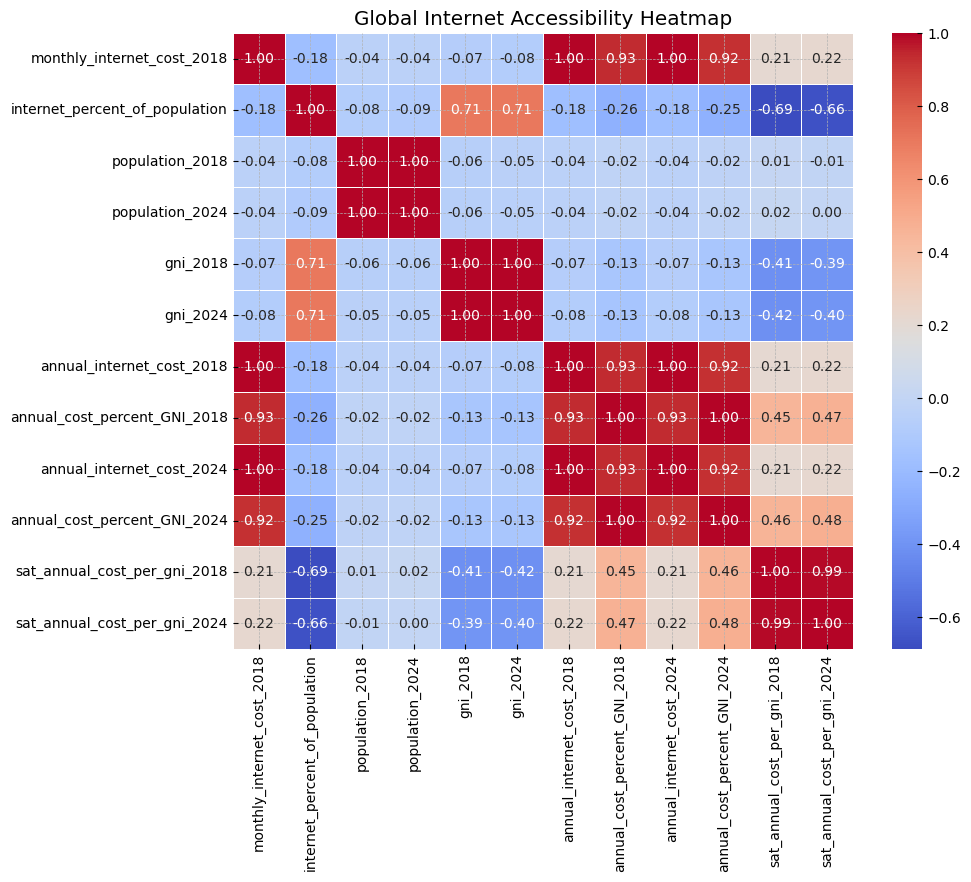

In [77]:
# Heatmap: 

correlation_data = merged_df.corr(numeric_only=True)
plt.figure(figsize=(10,8 ))
sns.heatmap(correlation_data, annot=True, fmt=".2f", cmap ='coolwarm', linewidths=.5)
plt.title('Global Internet Accessibility Heatmap')
plt.show()

# 1) There is a strong positive correlation (0.71) between internet_percent_of_population and gni_2018, gni_2024
# 2) There is low to no correlation between the monthly_internet_cost_2018 and internet_percent_of_population, population_2018, population_2024, gni_2018, and gni_2024.
# I think the monthly_internet_cost may be correlated to other factors not analyzed in this project (like adult literacy rate, or infrastructure index).
# This could be an interesting further study since I orignally assumed that the monthly_internet_cost may be positively correlated to gni per capita.
# annual_internet_cost and annual_cost_percent_GNI for both years are derived values from the monthly_internet_cost_2018, so that's why the correlation is very strong (no real insights here)


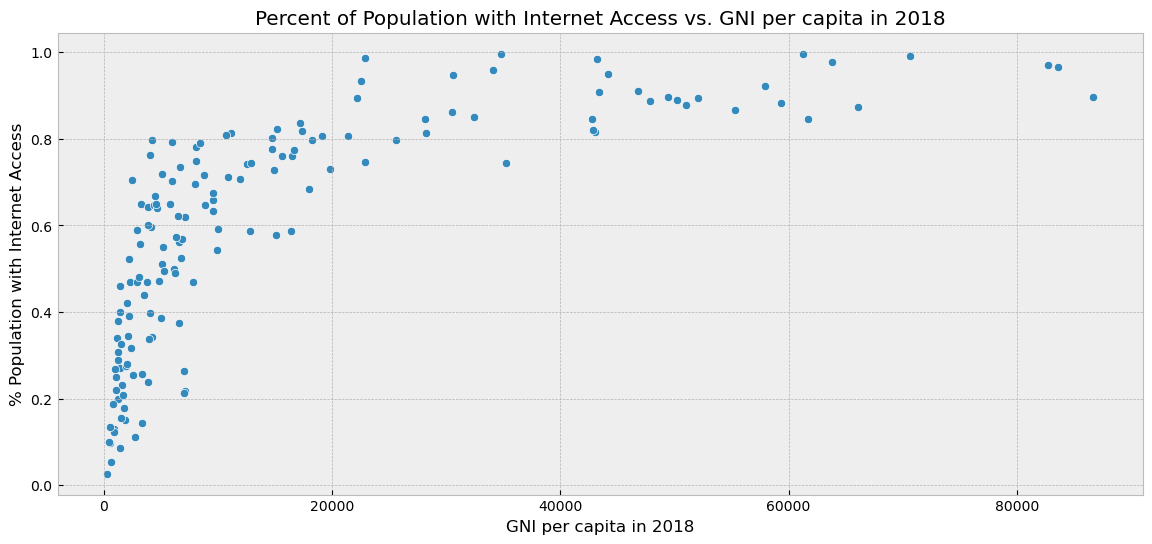

In [78]:
# Scatterplot: Is there a between a country's GNI per capita and the percentage of the population with access to internet?
# Yes! There is a strong relationship between a country's internet accessibility, defined as a % of the population, and its GNI per capita.

plt.figure(figsize=(14, 6))
sns.scatterplot(data=merged_df, x='gni_2018', y='internet_percent_of_population')

plt.title('Percent of Population with Internet Access vs. GNI per capita in 2018')
plt.xlabel('GNI per capita in 2018')
plt.ylabel('% Population with Internet Access')
plt.savefig('Percent_Population_withInternet_Access_vs_GNI_2018.png', dpi=300)
plt.show()


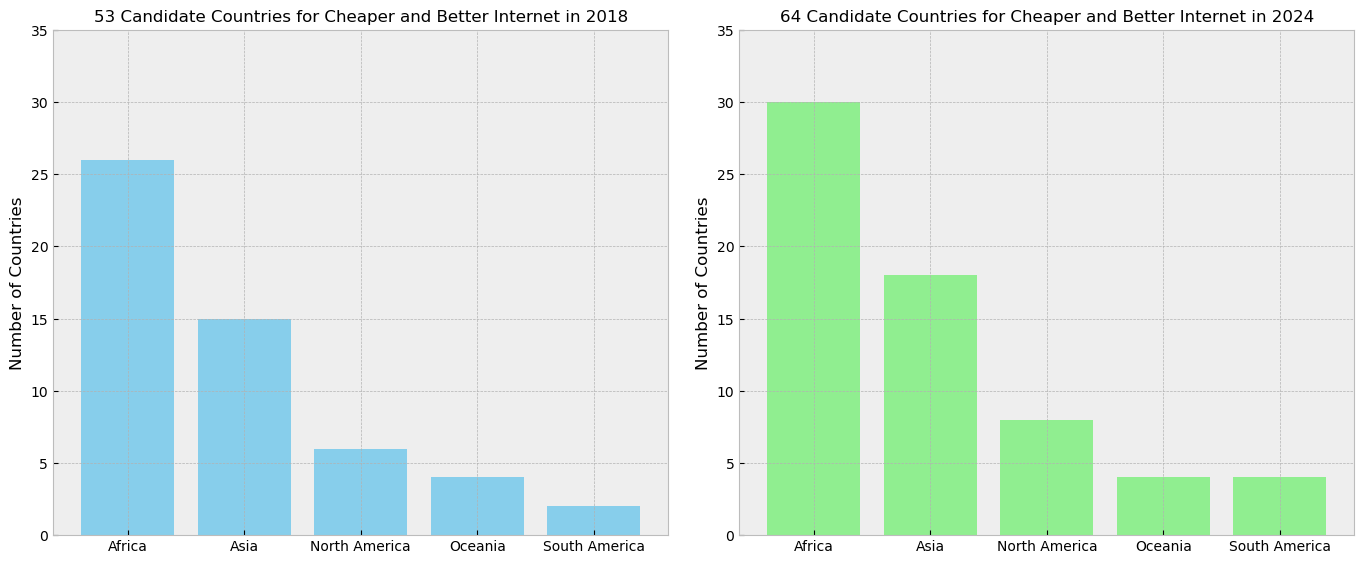

In [79]:
# Histogram subplot: Candidate Countries FOR CHEAPER internet and higher internet access rate
# Putting the plots next to each other for comparison, I can see that there is an increase in candidate countries in Africa and Asia for 2018 to 2024.


# Create the plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Remember that 'candidate_countries_2024_frequency' and 'candidate_countries_2024_frequency' are already pandas series, so I can use .index and .values here
axs[0].bar(candidate_countries_2018_frequency.index, candidate_countries_2018_frequency.values, color='skyblue')
axs[0].set_title('53 Candidate Countries for Cheaper and Better Internet in 2018', fontsize=12)
axs[0].set_ylabel('Number of Countries')
axs[0].set_ylim(0, 35)

axs[1].bar(candidate_countries_2024_frequency.index, candidate_countries_2024_frequency.values, color='lightgreen')
axs[1].set_title('64 Candidate Countries for Cheaper and Better Internet in 2024',fontsize=12)
axs[1].set_ylabel('Number of Countries')
axs[1].set_ylim(0, 35)

# setting the xlabel to "Continent" is a little redundant and cluttered, so I left it out: axs[0].set_xlabel('Continent')
# The subplots are too cluttered so .tight_layout() will adjust the padding around it
plt.tight_layout(pad = 2.0)

# save the plot 
plt.savefig('Candidates_betterinternet_2018_2024.png')

# Show the plot
plt.show()



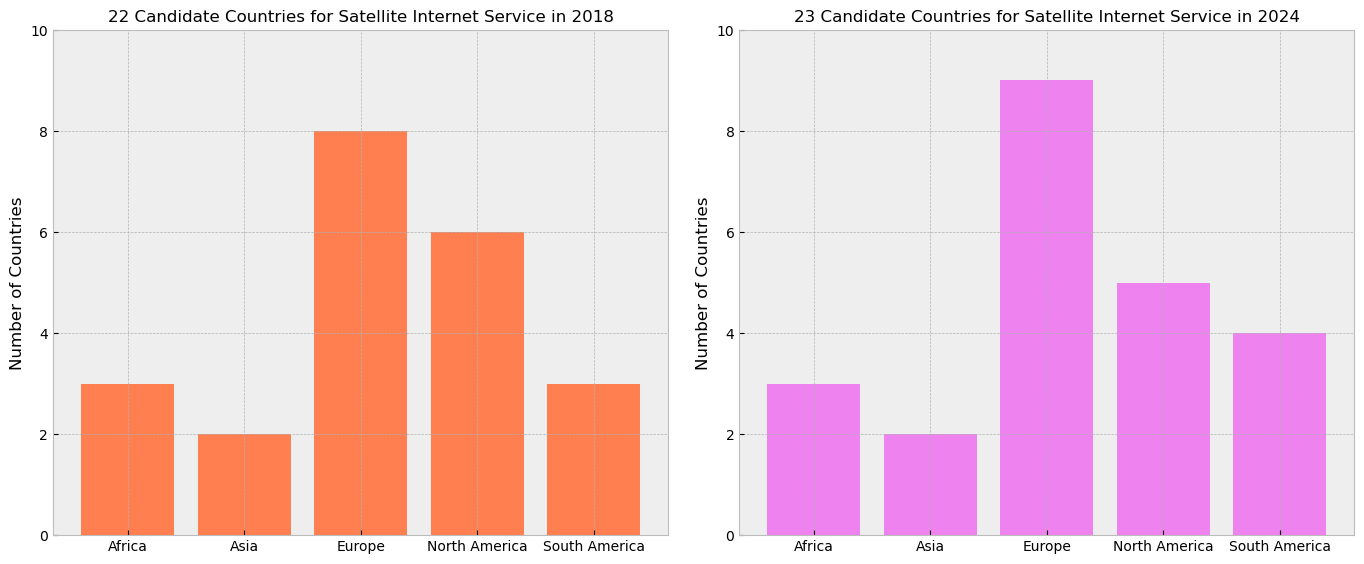

In [80]:
# Histogram subplot: Candidate Countries FOR SATELLITE internet service where the SATELLITE annual cost is < 10% of gni per capita and the internet_%_populations is less than 75%

# Create the plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))


candidate_countries_satellite_2018_frequency_sorted = candidate_countries_satellite_2018_frequency.sort_index()
candidate_countries_satellite_2024_frequency_sorted = candidate_countries_satellite_2024_frequency.sort_index()

# Remember that 'candidate_countries_satellite_2024_frequency' is a already a pandas series, so I can use .index and .values here
# make sure to SORT by INDEX so the continent names align in both graphs.

axs[0].bar(candidate_countries_satellite_2018_frequency_sorted.index, candidate_countries_satellite_2018_frequency_sorted.values, color='coral', )
axs[0].set_title('22 Candidate Countries for Satellite Internet Service in 2018', fontsize=12)
axs[0].set_ylabel('Number of Countries')
axs[0].set_ylim(0, 10)

axs[1].bar(candidate_countries_satellite_2024_frequency_sorted.index, candidate_countries_satellite_2024_frequency_sorted.values, color='violet')
axs[1].set_title('23 Candidate Countries for Satellite Internet Service in 2024',fontsize=12)
axs[1].set_ylabel('Number of Countries')
axs[1].set_ylim(0, 10)

# setting the xlabel to "Continent" is a little redundant and cluttered, so I left it out: axs[0].set_xlabel('Continent')
# The subplots are too cluttered so .tight_layout() will adjust the padding around it
plt.tight_layout(pad = 2.0)

# save the plot 
plt.savefig('Satellite_Candidate_Countries_2018_2024.png')

# Show the plot
plt.show()



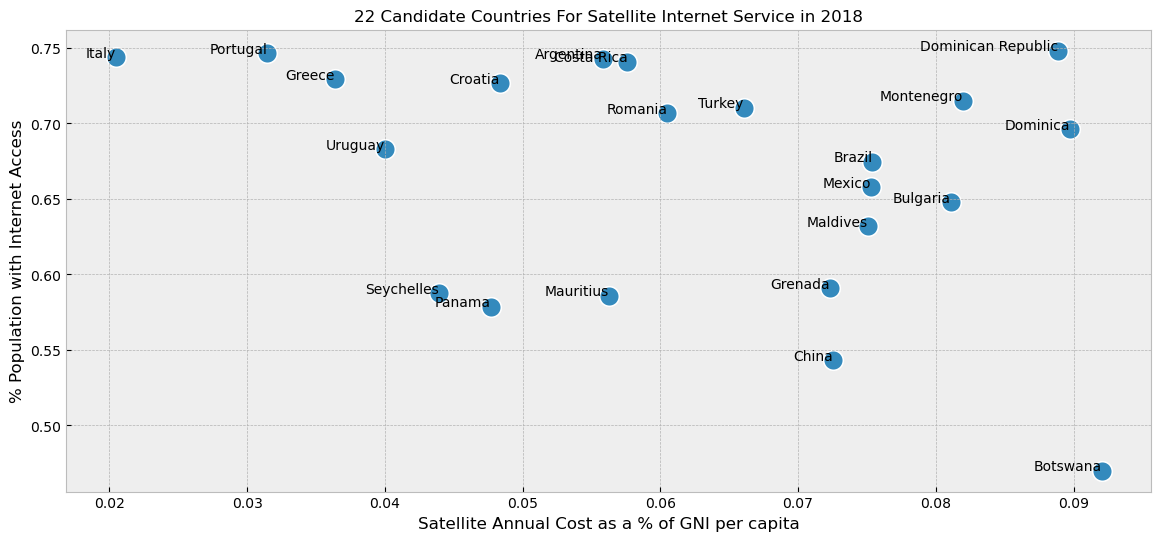

In [81]:
# SCATTERPLOT: Candidate countries For Satellite Internet Service in 2018
plt.figure(figsize=(14, 6))
sns.scatterplot(data=candidate_countries_satellite_2018, x='sat_annual_cost_per_gni_2018', y='internet_percent_of_population', s = 200)

plt.title('22 Candidate Countries For Satellite Internet Service in 2018', fontsize = 12)
plt.xlabel('Satellite Annual Cost as a % of GNI per capita')
plt.ylabel('% Population with Internet Access')

# Adding data labels
for index, row in candidate_countries_satellite_2018.iterrows():
    # Use the 'country' name as the label directly.
    plt.text(x=row['sat_annual_cost_per_gni_2018'], 
             y=row['internet_percent_of_population'], 
             s=row['country'],  # 's' will display the 'country' name
             color='black', 
             ha='right', 
             va='baseline')

plt.savefig('Candidates_For_Sat_Service_2018.png', dpi=300)
plt.show()


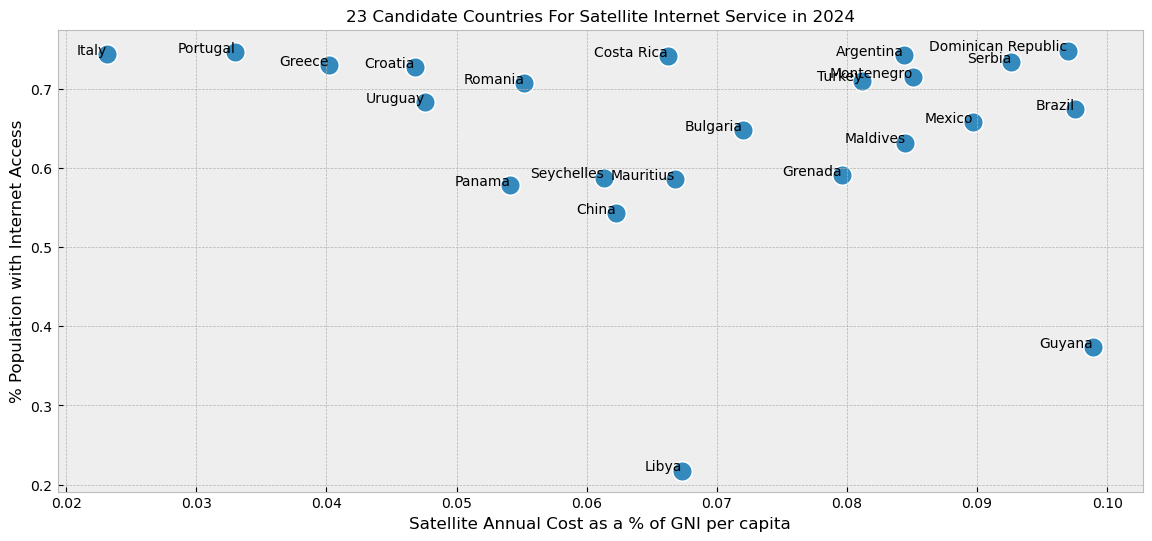

In [82]:
# SCATTERPLOT: Candidate countries For Satellite Internet Service in 2024

plt.figure(figsize=(14, 6))
sns.scatterplot(data=candidate_countries_satellite_2024, x='sat_annual_cost_per_gni_2024', y='internet_percent_of_population', s = 200)

plt.title('23 Candidate Countries For Satellite Internet Service in 2024', fontsize = 12)
plt.xlabel('Satellite Annual Cost as a % of GNI per capita')
plt.ylabel('% Population with Internet Access')

# Adding data labels
for index, row in candidate_countries_satellite_2024.iterrows():
    # Use the 'country' name as the label directly.
    plt.text(x=row['sat_annual_cost_per_gni_2024'], 
             y=row['internet_percent_of_population'], 
             s=row['country'],  # 's' will display the 'country' name
             color='black', 
             ha='right', 
             va='baseline')

plt.savefig('Candidates_For_Sat_Service_2024.png', dpi=300)
plt.show()

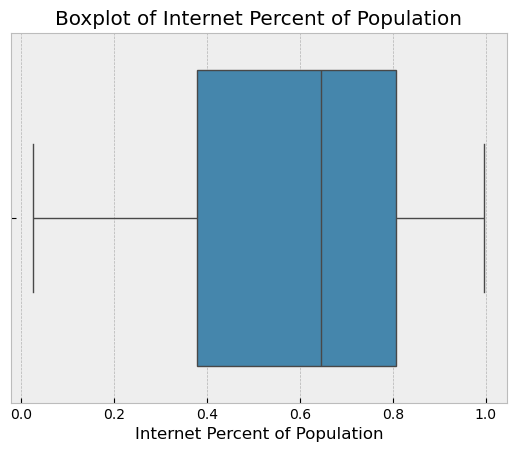

In [83]:
# Boxplot: internet_percent_of_population
sns.boxplot(data=merged_df, x='internet_percent_of_population')

# Calculating the median and quartiles
median = merged_df['internet_percent_of_population'].median()
Q1 = merged_df['internet_percent_of_population'].quantile(0.25)
Q3 = merged_df['internet_percent_of_population'].quantile(0.75)

plt.title('Boxplot of Internet Percent of Population')
plt.xlabel('Internet Percent of Population')
plt.show()

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

##### 2018 Data Exploration:
1) Is there a between a country's GNI per capita and the percentage of the population with access to internet?
   - There is a positive relationship (corr = 0.71) between a country's GNI per capita and the percentage of the population with access to the internet.
   - This relationship can be used to study the need for a country's internet access because as the GNI per capita increases over time, the rate of internet access should also increase correspondingly.

2) How many countries have less than 75% of their population with access to the internet?
   - 100 countries have less than 75% of their population with access to the internet. 34 African countries and 26 Asian countries.

3) How many countries have an average monthly internet cost exceeding 60 USD/ month?
   - There are 37 countries with the average monthly internet cost above $60/month in 2018.

4) How many countries have an average annual internet cost that is higher than 10% of the GNI per capita?
   - There are 53 countries that have an annual internet cost that is higher than 10% of the GNI per capita. Out of 53 countries, 26 are African countries and 15 are Asian countries.

5) In 2018, what are the candidate countries where Starlink can expand their internet satellite business?
   - In 2018, There are 22 countries (8-Europe, 8-North America, 3-Africa, 3-South America, 2-Asia) in which the population lacks internet access and CAN AFFORD SATELLITE internet.
   - The countries are: Botswana, Mauritius, Seychelles, China, Maldives, Bulgaria, Croatia, Greece, Italy, Montenegro, Portugal, Romania, Turkey, Costa Rica, Dominica, Dominican Republic, Grenada, Mexico, Panama, Argentina, Brazil, and Uruguay. 

##### Projections for 2024:
Based on the 2024 population and GNI per capita data, the 2018 country internet access percentage of the population, and the $69/month average cost of Starlink service:

6) How many countries have an average annual internet cost that is higher than 10% of the GNI per capita?
   - In 2024, there are 66 countries, including 30 African countries and 20 Asian countries, that have an annual internet cost that is higher than 10% of the GNI per capita. In 2018, there were 53 countries.

7) In 2024, what are the candidate countries where Starlink can expand their internet satellite business?
   - In 2024: there are 23 countries (9-Europe, 5-North America, 3-Africa, 4-South America, 2-Asia) in which the population lacks internet access and can afford satellite internet.
   - The countries are: Libya, Mauritius, Seychelles, China, Maldives, Bulgaria, Croatia, Greece, Italy, Montenegro, Portugal, Romania, Serbia, Turkey, Costa Rica, Dominican Republic, Grenada, Mexico, Panama, Argentina, Brazil, Guyana, and Uruguay.